# Bepaling van warmtecapaciteit van een onbekend materiaal


# Introductie

Onbekende materialen kunnen geïdentificeerd worden door hun eigenschappen te meten. Een van deze eigenschappen is de warmtecapaciteit. In dit practicum gaan we de warmtecapaciteit van een onbekend materiaal bepalen door middel van een calorimeter experiment. Daarbij wordt een bepaalde massa van het materiaal naar een bekende temperatuur gebracht waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaatst. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend.

# Theorie

De soortelijke warmte $c$ van een materiaal is gedefinieerd als de hoeveelheid warmte $Q$ die nodig is om de temperatuur $T$ van een kilogram van het materiaal met één graad Celsius (of één Kelvin) te verhogen:

$$
    c = \frac{Q}{m \Delta T}
$$ (eq:heat_capacity)

Waarbij $Q$ de hoeveelheid warmte in Joules is, $m$ de massa in kilogram is en $\Delta T$ de verandering in temperatuur is. Gegeven de wet van Black, die stelt dat de totale hoeveelheid warmte in een geïsoleerd systeem constant blijft, kunnen we de warmte die het onbekende materiaal verliest gelijkstellen aan de warmte die het water opneemt:

$$
    Q_{materiaal} = -Q_{water} 
$$ (eq:black)

wanneer we de massa's en de begintemperaturen van beide systemen kennen, maar slechts een van de twee soortelijke warmtes, kunnen we de onbekende soortelijke warmte berekenen. We combineren vergelijkingen [](#eq:heat_capacity) en [](#eq:black) om de volgende vergelijking te krijgen:

$$
    T_e = \frac{c_w m_w T_{w,b}+c_m m_m T_{m,b}}{c_w m_w + c_m m_m}
$$ (eq:combined)

Waarbij de subscripts $b$ en $e$ respectievelijk staan voor begintoestand en eindtoestand, $w$ voor water en $m$ voor het onbekende materiaal.

Bij metingen aan verschillende massa's van het onbekende materiaal en vervolgens een least square fit aan bovenstaande vergelijking kunnen we een precieze waarde voor de soortelijke warmte van het onbekende materiaal bepalen. Dat is, wanneer de warmtecapaciteit van bijvoorbeeld de beker te verwaarlozen is.


# Methode en materialen

## Ontwerp
De bovenstaande theorie wordt gebruikt om de soortelijke warmte van een onbekend materiaal te bepalen. Het experiment bestaat uit het verwarmen van verschillende massa's van het onbekende materiaal tot een bekende temperatuur, waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaats. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend. Om de tijd voor het meten van meerdere materialen te reduceren, worden de data van de verschillende groepen in het lokaal samengevoegd. Van tevoren is afgesproken welke massa's door welke groep worden gemeten, en hoeveel water er gebruikt wordt.

## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Calorimeter
- Thermometer of temperatuursensor
- Verwarmingsbron 
- Diverse massablokjes van onbekend materiaal
- Weegschaal
- Water
- Maatcilinder of maatbeker


```{figure} figures/c_onbekend_setup.jpg
:width: 70%
:label: fig_c_onbekend_setup

Een schematische weergave van de opstelling
```


## Procedure
Bespreek wie welke massa's van het onbekende materiaal gaat meten.
Bespreek ook hoeveel water er gebruikt gaat worden.
Bepaal de begintemperaturen.
Hevel het aantal afgesproken massa's in de maatbeker. 
Roer voorzicht zodat de temperatuur homogeen is.
Noteer de hoogste gemeten temperatuur, dit is $T_e$.
Wissel de metingen uit met de andere groepen en voer de data-analyse uit.

```{note}
Hieronder staat een voorbeeld hoe je een grafiek moet opslaan en vervolgens in je document kunt oproepen.
Het voorbeeld kun je natuurlijk straks verwijderen.
```

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares


# Resultaten


In [23]:
T_e = np.array([24.9, 25.5, 22.4, 25.0, 26.3])
c_water = 4186  # J/(kg*C)
m_water = np.array([0.3,0.3,0.305,0.3,0.3])  # kg
T_b_water = np.array([21.0,20.8,21.1,20.9,21.2])
m_stof = np.array([0.1457,0.199,0.05,0.150,0.250])  # kg
T_b_stof = np.array([68.5,68.5,68.5,68.5,68.5])  # C


# Definieer de residuenfunctie (verschil tussen gemeten en model)
def residuen(c):
    T_model = (c_water * m_water * T_b_water + c * m_stof * T_b_stof) / (c_water * m_water + c * m_stof)
    return T_model - T_e

# Least squares optimalisatie
result = least_squares(residuen, x0=1000) 
c_stof = result.x

print(f"De soortelijke warmte van de stof is is ongeveer {c_stof} J/(kg*C)")

De soortelijke warmte van de stof is is ongeveer [688.02173811] J/(kg*C)


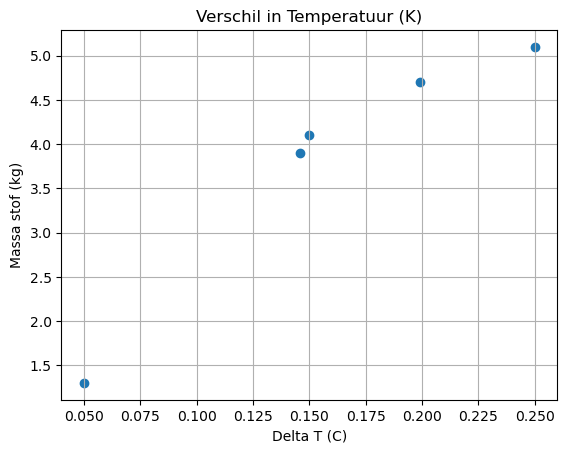

In [24]:
T_verschil = T_e - T_b_water
plt.scatter(m_stof, T_verschil)
plt.xlabel("Delta T (C)")
plt.ylabel("Massa stof (kg)")
plt.title("Verschil in Temperatuur (K)")
plt.grid()
plt.show()

```{figure} figures/naam.png
:width: 50%
:label: fig_naam 

Hier is het onderschrift van de figuur.
```

# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.

**Discussie:**  
Bij het uitvoeren van deze proef zijn er aan aantal dingen niet goed gegaan, waardoor het resultaat een hoge onnauwkeurigheid heeft. Dit zijn:
 - Er zijn te weinig metingen uitgevoerd.
 - De gebruikte maatbeker is niet goed geisoleerd. Het kan zijn dat er warmte vanuit de maatbeker naar buiten is gelekt.
 - Nadat de stof in het water was gelegd, is niet lang genoeg gewacht voor het meten van de eindtemperatuur. Het is daarom niet zeker dat de gemeten eindtemperatuur de daadwerkelijke eindtemperatuur is.
 - Er is gebruik gemaakt van andermans data.
 - Het water in de maatbeker is niet goed genoeg geroerd . Het is daarom niet zeker of het water overal in de maatbeker dezelfde eindtemperatuur had.
 

Voor een erhaling van dit onderzoek kunnen de volgende dingen verbeterd worden:
 - Meer metingen zorgen voor een betere nauwkeurigheid.
 - Een beter geisoleerde maatbeker zal helpen met een nauwkeurigere schatting voor hoeveel energie er daadwerkeijk van het water naar het blokje is gegaan, en zal minder energie aan de omgeving af gegeven worden. dit geldt voornamelijk tijdens het roeren wanneer meer wateroppervlak in aanraking kamt met de wand/open lucht.
 - In plaats van een keer de eindtemperatuur te meten, kan de temperatuur van het water bijvoorbeeld elke 20 seconden worden gemeten. Door de hoogste van al deze waarden te gebruiken is zeker dat de juiste eindtemperatuur wordt gebruikt.
 - Het water zou constant, of elke bijvoorbeeld 10 secondenm, goed geroerd moetn worden. Hierdoor is de temperatuur van het water overal (min of meer) hetzelfde. 

**Conclusie:**  
De berekende warmtecpaciteit van de onbekende stof is 688.02 J/(kg*°C). De metingen van deze proef zijn niet nauwkeurig genoeg uitgevoerd om te bepalen om welke stof het gaat.